In [2]:
import pandas as pd
import os
from matplotlib import pyplot as plt
import numpy as np

In [3]:
dmr_dir = '/home/group-cvg/cvg-students/sshah/d_m_r'

In [ ]:
results = {}

In [ ]:
model = ['gru','lstm','transformer']
seq_len = [20,30,50,70,100]

In [ ]:
for m in model:
    results[m] = []
    for seq in seq_len:
        exp = 'seq_{seq}'.format(seq=seq)
        file_path = os.path.join(dmr_dir,'results',m,exp,'evaluation','{exp}.txt'.format(exp=exp))
        IDF1, MOTA = convert_text_to_scores(file_path)
        results[m].append({'seq':seq,'IDF1':IDF1,'MOTA':MOTA})

In [ ]:
def convert_text_to_scores(file_path):
    with open(file_path, "r+") as file: 
        results = file.readlines()
    IDF1 = float(results[-1].split(' ')[2].split('%')[0])
    MOTA = float(results[-1].split(' ')[-5].split('%')[0])
    return IDF1, MOTA

In [ ]:
metric = 'MOTA'
df_list = []
for m in model:
    data = results[m]
    df = pd.DataFrame(data).set_index('seq').rename({metric:m},axis=1)
    df = df[m]
    df_list.append(df)

In [ ]:
df_all = pd.DataFrame(df_list)

In [ ]:
df_all.T.plot()
plt.suptitle(metric)

In [103]:
def convert_text_to_scores(file_path):
    with open(file_path, "r+") as file: 
        results = file.readlines()
    IDF1 = float(results[-1].split(' ')[2].split('%')[0])
    MOTA = float(results[-1].split(' ')[-5].split('%')[0])
    return IDF1, MOTA

In [150]:
metric = 'MOTA'
df_list = []
for m in model:
    data = results[m]
    df = pd.DataFrame(data).set_index('seq').rename({metric:m},axis=1)
    df = df[m]
    df_list.append(df)

In [151]:
df_all = pd.DataFrame(df_list)

Text(0.5, 0.98, 'MOTA')

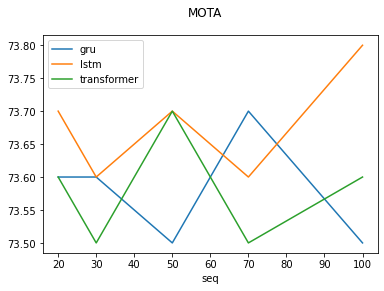

In [152]:
df_all.T.plot()
plt.suptitle(metric)